<a href="https://colab.research.google.com/github/lmcanavals/experiments/blob/main/notebooks/aa_exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Datos Exploratorio

In [ ]:
!pip install wquantiles

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

In [ ]:
BASE="https://raw.githubusercontent.com/lmcanavals/practical-statistics-for-data-scientists/master/data/"
AIRLINE_STATS_CSV   = f"{BASE}airline_stats.csv"
KC_TAX_CSV          = f"{BASE}kc_tax.csv.gz"
LC_LOANS_CSV        = f"{BASE}lc_loans.csv"
AIRPORT_DELAYS_CSV  = f"{BASE}dfw_airline.csv"
SP500_DATA_CSV      = f"{BASE}sp500_data.csv.gz"
SP500_SECTORS_CSV   = f"{BASE}sp500_sectors.csv"
STATE_CSV           = f"{BASE}state.csv"

In [ ]:
state = pd.read_csv(STATE_CSV)
state.head(8)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE


In [ ]:
state['Population'].mean()

6162876.3

In [ ]:
trim_mean(state['Population'], 0.1)

4783697.125

In [ ]:
state['Murder.Rate'].mean()

4.066

In [ ]:
np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

In [ ]:
wquantiles.median(state['Murder.Rate'], weights=state['Population'])

4.4

## Estimaciones de Variabilidad

In [ ]:
state['Population'].std()

6848235.347401142

Rango Intercuartil: diferencia entre 75% - 25%

In [ ]:
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

4847308.0

## Percentiles y Boxplots

In [ ]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

In [ ]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))
df.index = [f"{p*100}%" for p in percentages]
df.transpose()

,5.0%,25.0%,50.0%,75.0%,95.0%
Murder.Rate,1.6,2.425,4.0,5.55,6.51


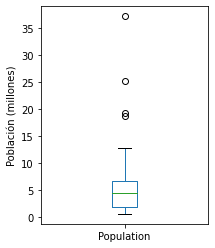

In [ ]:
ax = (state['Population']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Población (millones)')

plt.show()

## Tablas de frecuencia e Histogramas

In [ ]:
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64

In [ ]:
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis=1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
pd.DataFrame(groups)

,BinRange,Count,States
0,"(526935.67, 4232659.0]",24,"WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N..."
1,"(4232659.0, 7901692.0]",14,"KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA"
2,"(7901692.0, 11570725.0]",6,"VA,NJ,NC,GA,MI,OH"
3,"(11570725.0, 15239758.0]",2,"PA,IL"
4,"(15239758.0, 18908791.0]",1,FL
5,"(18908791.0, 22577824.0]",1,NY
6,"(22577824.0, 26246857.0]",1,TX
7,"(26246857.0, 29915890.0]",0,
8,"(29915890.0, 33584923.0]",0,
9,"(33584923.0, 37253956.0]",1,CA


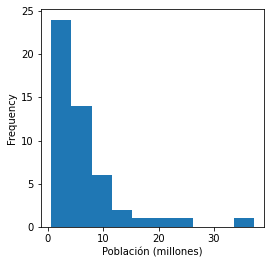

In [ ]:
ax = (state['Population']/1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Población (millones)')

plt.show()

### Estimación de densidad

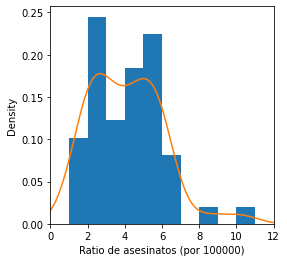

In [ ]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12],
                                    bins=range(1, 12), figsize=(4, 4))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Ratio de asesinatos (por 100000)')

plt.show()